# Лабораторная работа 8

## Клепиков Никита

Dataset: Students Performance in Exams

Ссылка на датасет: https://www.kaggle.com/spscientist/students-performance-in-exams

Группа: 6132 - 010402D

Для начала необходимо подключить необходимые для выполнения лабораторной работы библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from tqdm.notebook import tqdm
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, silhouette_score

0 Найти датасет для кластеризации: для этого берём датасет для мультиклассовой классификации и временно убираем метки классов. Эти метки классов пригодятся нам для оценки качества кластеризации. Хотя в реальной жизни такой роскоши скорее всего не будет, однако наличие априорного знания о кластерах позволит нам посчитать несколько дополнительных метрик. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений.

In [2]:
students = pd.read_csv('Students.csv')
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


* gender - пол (бинарный)
        male - мужской
        female - женский
* race/ethnicity - раса/этническая принадлежность (категориальный)
        group A
        group B
        group C
        group D
        group E

* parental level of education - уровень образования родителей (категориальный)
        bachelor's degree - степень бакалавра
        some college - несколько колледжей
        master's degree - степень магистра
        associate's degree - степень младшего специалиста
        high school - средняя школа
        some high school - несколько средних школ
* lunch - обед (бинарный)
        standard - стандартный
        free/reduced - бесплатный/льготный
* test preparation course - курс подготовки к экзаменам (бинарный)
        completed - пройден
        none - не пройден
* math score - баллы по математике (числовой)

* reading score - баллы по чтению (числовой)

* writing score - баллы по письменному экзамену (числовой)

* sum - сумма баллов (числовой)

* status - статус (бинарный)
        clever - умный
        beautiful - красивый
* gpa - средний балл (числовой)

1 Выполните иерархическую агломеративную кластеризацию (scipy.cluster.hierarchy), постройте график-дендрограмму (hierarchy.dendrogram)

In [3]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
students["gender"], _ = pd.factorize(students["gender"])
students["test preparation course"], _ = pd.factorize(students["test preparation course"])
students["race/ethnicity"], _ = pd.factorize(students["race/ethnicity"])
students["parental level of education"], _ = pd.factorize(students["parental level of education"])
students["lunch"], _ = pd.factorize(students["lunch"])

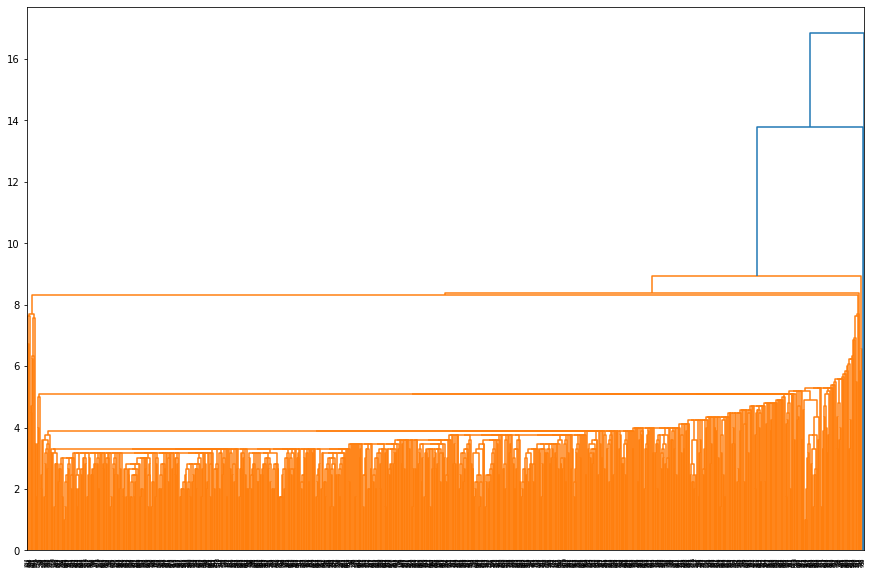

In [5]:
X, y = students.drop("test preparation course", axis=1), students["test preparation course"]
hierarchy = linkage(X, metric="euclidean")
plt.figure(figsize=(15, 10))
dendrogram(hierarchy, orientation="top", distance_sort="descending", show_leaf_counts=True)
plt.show()

2 На том же датасете выподните кластеризацию, используя любой другой метод кластеризации (пока с произвольными гиперпараметрами)

In [6]:
def get_metrics(X, y, model):
    return {
        "ARI": adjusted_rand_score(y, model.labels_),
        "AMI": adjusted_mutual_info_score(y, model.labels_),
        "Homogeneity": homogeneity_score(y, model.labels_),
        "Completeness": completeness_score(y, model.labels_),
        "V-measure": v_measure_score(y, model.labels_),
        "Silhouette": silhouette_score(X, model.labels_)
    }

KMeansAlgo = KMeans()
clusters = KMeansAlgo.fit_predict(X)
np.unique(clusters, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([ 37, 149, 137, 132,  97, 149, 166, 133], dtype=int64))

In [7]:
get_metrics(X, y, KMeansAlgo)

{'ARI': 0.011307920848326526,
 'AMI': 0.025784125949194,
 'Homogeneity': 0.058111645752658314,
 'Completeness': 0.018748914446879466,
 'V-measure': 0.028350828350858396,
 'Silhouette': 0.2840816795002078}

3 Выполните оптимизацию гиперпараметров кластеризации (либо иерархической модели из п. 1, либо иной модели из п. 2, на ваш выбор; в случае иерархической кластеризации из п. 1 гиперпараметр — пороговое расстояние между центроидами, являющееся границей разбиения на кластеры). Оптимизацию выполните, используя одну из метрик качества кластеризации, для которых нам понадобится информация об исходных метках класса: Adjusted Rand Index (ARI), Adjusted Mutual Information (AMI), Гомогенность, полнота, V-мера.

In [8]:
parametrs = {
    "n_clusters": range(2, 10), 
    "max_iter": range(100, 500, 50), 
    "tol": [0.0001, 0.001, 0.01]
}

GridKMeansAlgo = GridSearchCV(
    KMeans(), 
    parametrs, 
    scoring="v_measure_score", 
    cv=5
)

GridKMeansAlgo.fit(X, y)

GridSearchCV(cv=5, estimator=KMeans(),
             param_grid={'max_iter': range(100, 500, 50),
                         'n_clusters': range(2, 10),
                         'tol': [0.0001, 0.001, 0.01]},
             scoring='v_measure_score')

In [9]:
print(f"Лучшие параметры для Tuned KMeans: {GridKMeansAlgo.best_params_}")

Лучшие параметры для Tuned KMeans: {'max_iter': 300, 'n_clusters': 9, 'tol': 0.01}


In [10]:
np.unique(GridKMeansAlgo.best_estimator_.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([120, 148, 138, 162, 111,  18,  92,  77, 134], dtype=int64))

In [11]:
get_metrics(X, y, GridKMeansAlgo.best_estimator_)

{'ARI': 0.009371195559869495,
 'AMI': 0.025663756418274227,
 'Homogeneity': 0.06033156157436291,
 'Completeness': 0.018668323057020552,
 'V-measure': 0.02851368928600448,
 'Silhouette': 0.2899962344138475}

4 Используя алгоритм/модель из п. 2 выполните оптимизацию гиперпараметра количества кластеров, используя "правило локтя" (анализируем график силуэта)

In [12]:
scores = list()

for cluster in tqdm(range(2, 50)):
    clusters = KMeans(n_clusters=cluster, max_iter=150, tol=0.0001).fit_predict(X)
    scores.append(silhouette_score(X, clusters))

  0%|          | 0/48 [00:00<?, ?it/s]

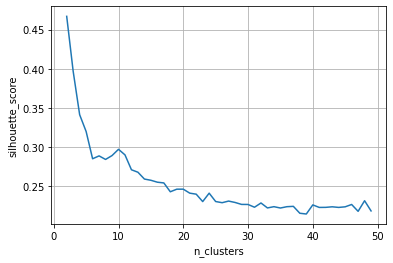

In [13]:
plt.plot(range(2, 50), scores)
plt.xlabel("n_clusters")
plt.ylabel("silhouette_score")
plt.grid(True)
plt.show()